In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/train-and-test/train.csv')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
None


id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [3]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
None


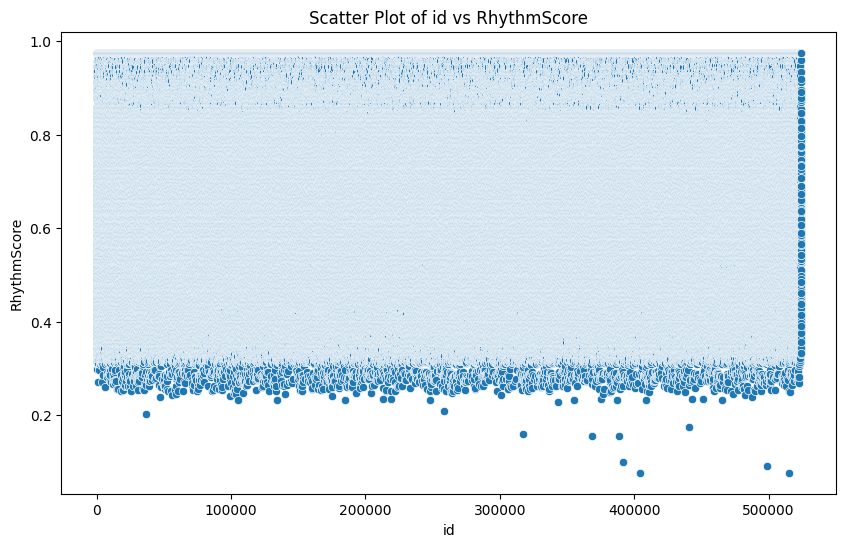

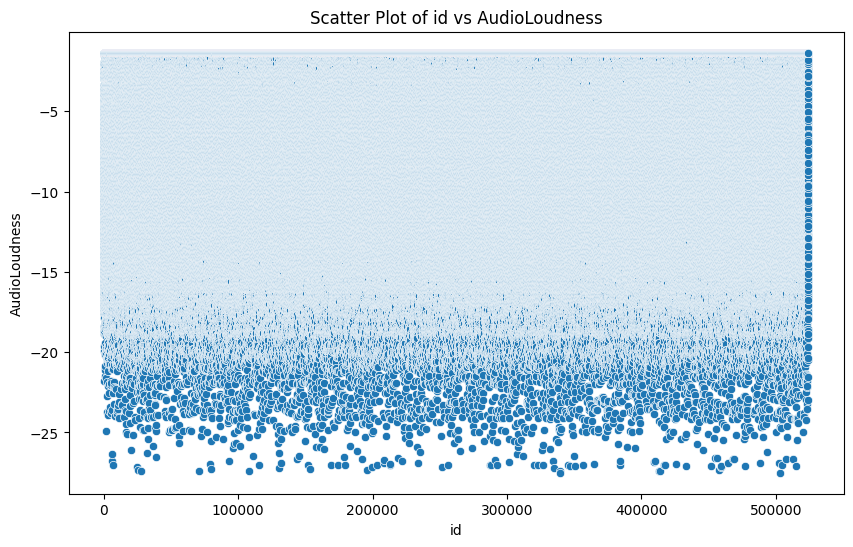

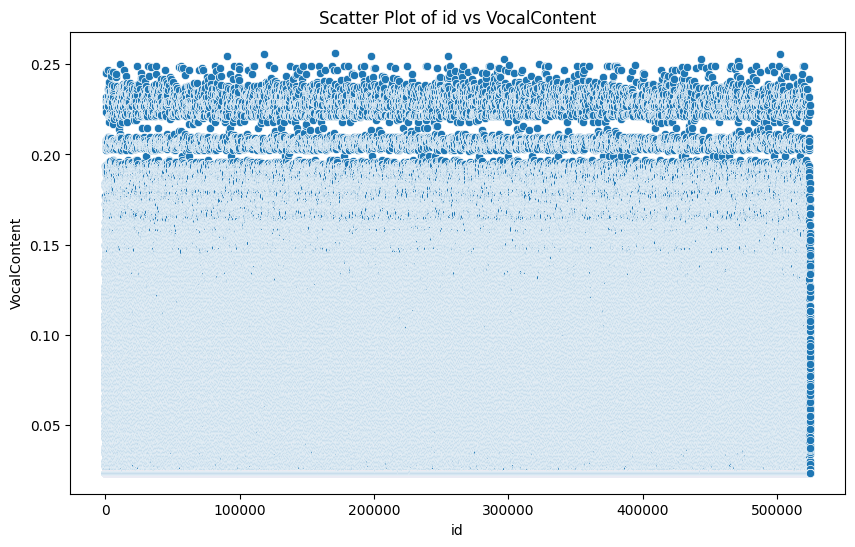

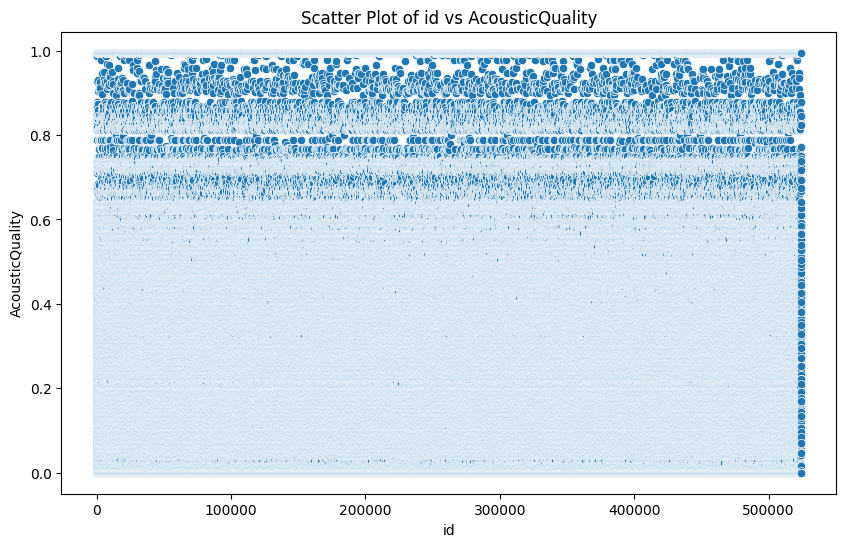

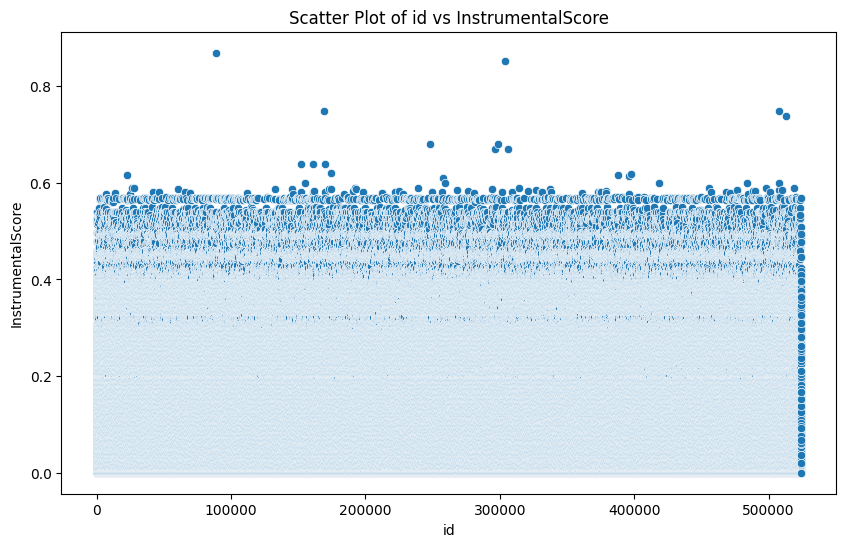

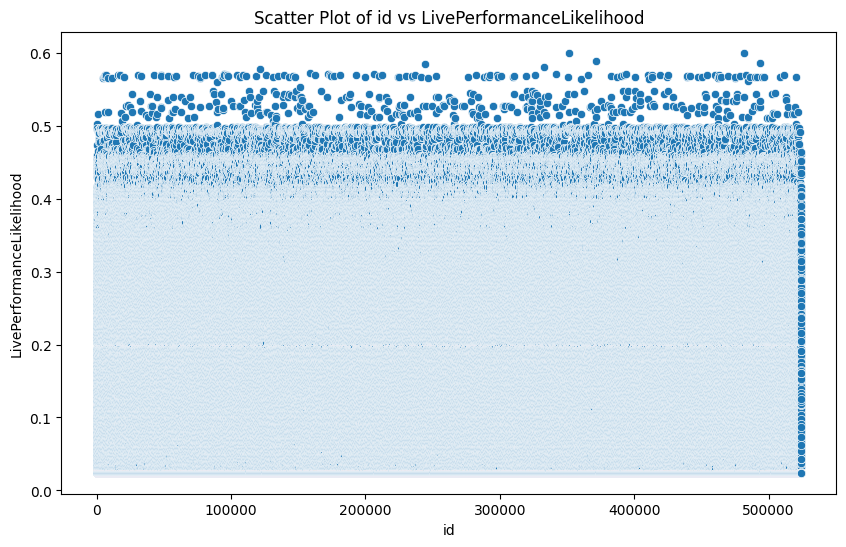

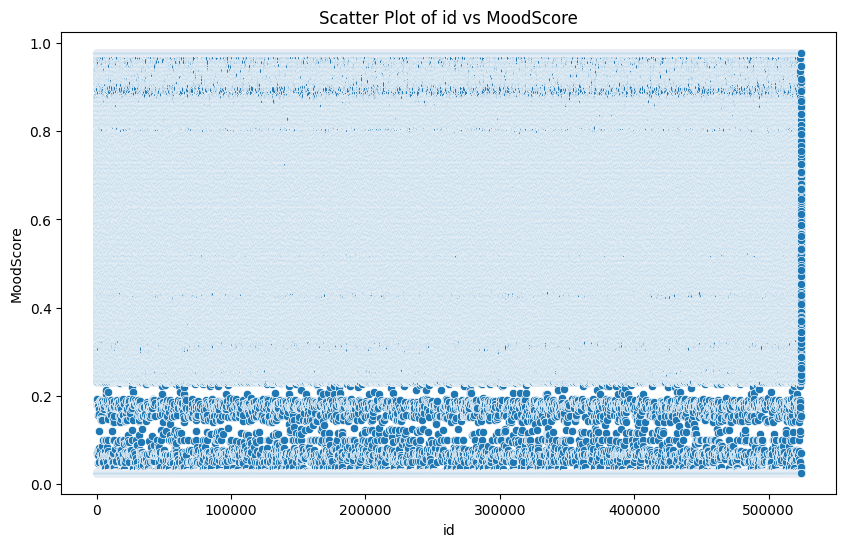

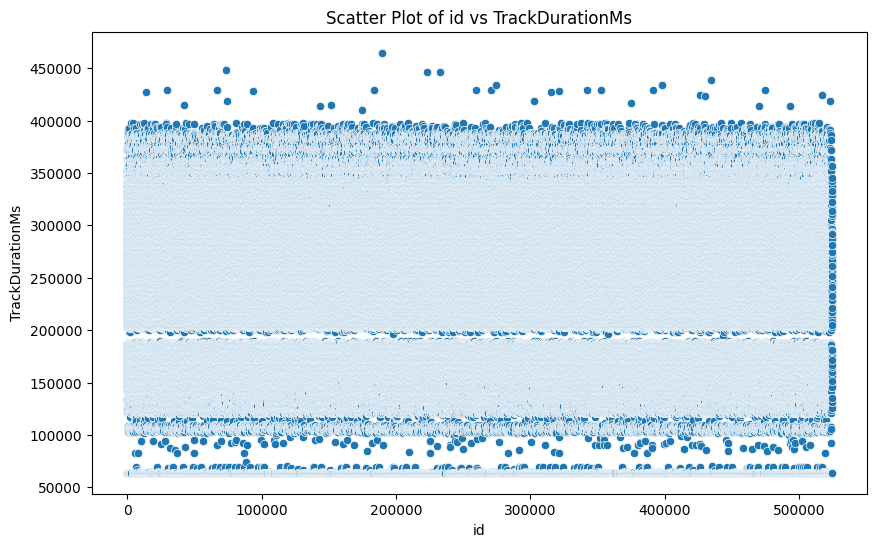

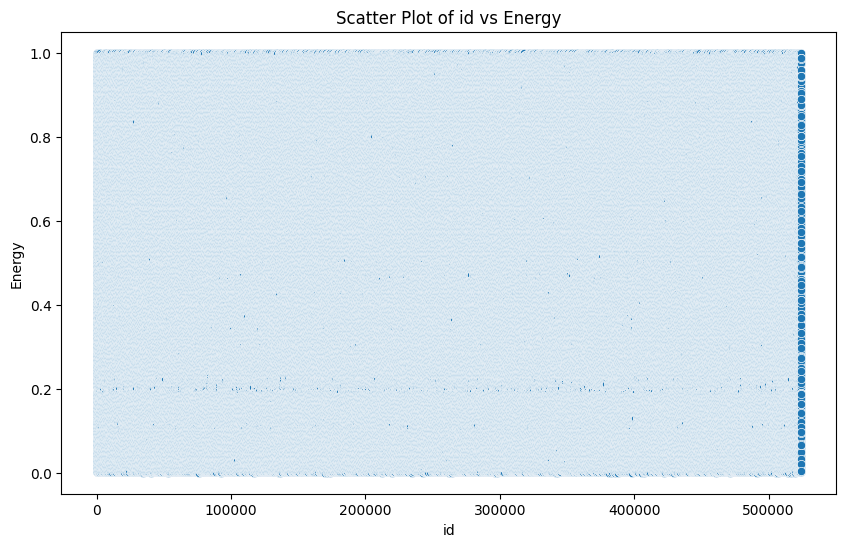

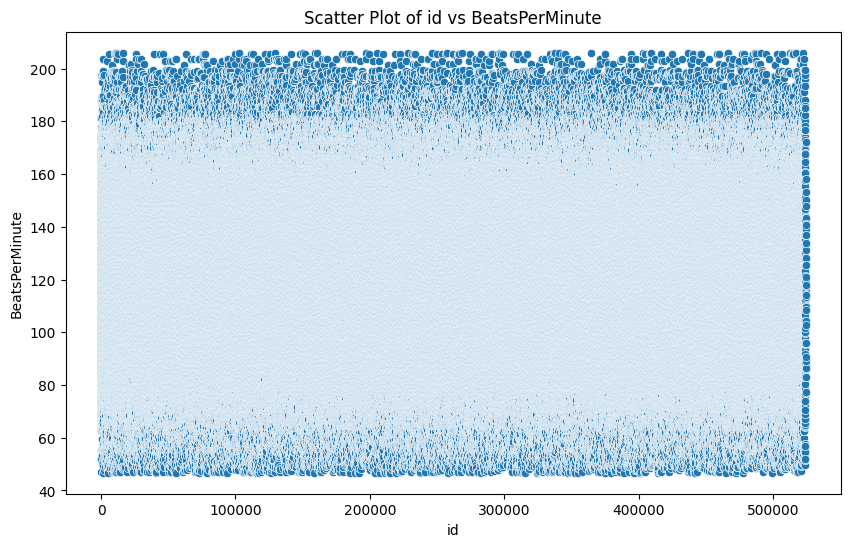

In [5]:
for col in df.columns:
    if col != 'id':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='id', y=col, alpha=1)
        plt.title(f'Scatter Plot of id vs {col}')
        plt.xlabel('id')
        plt.ylabel(col)
        plt.show()

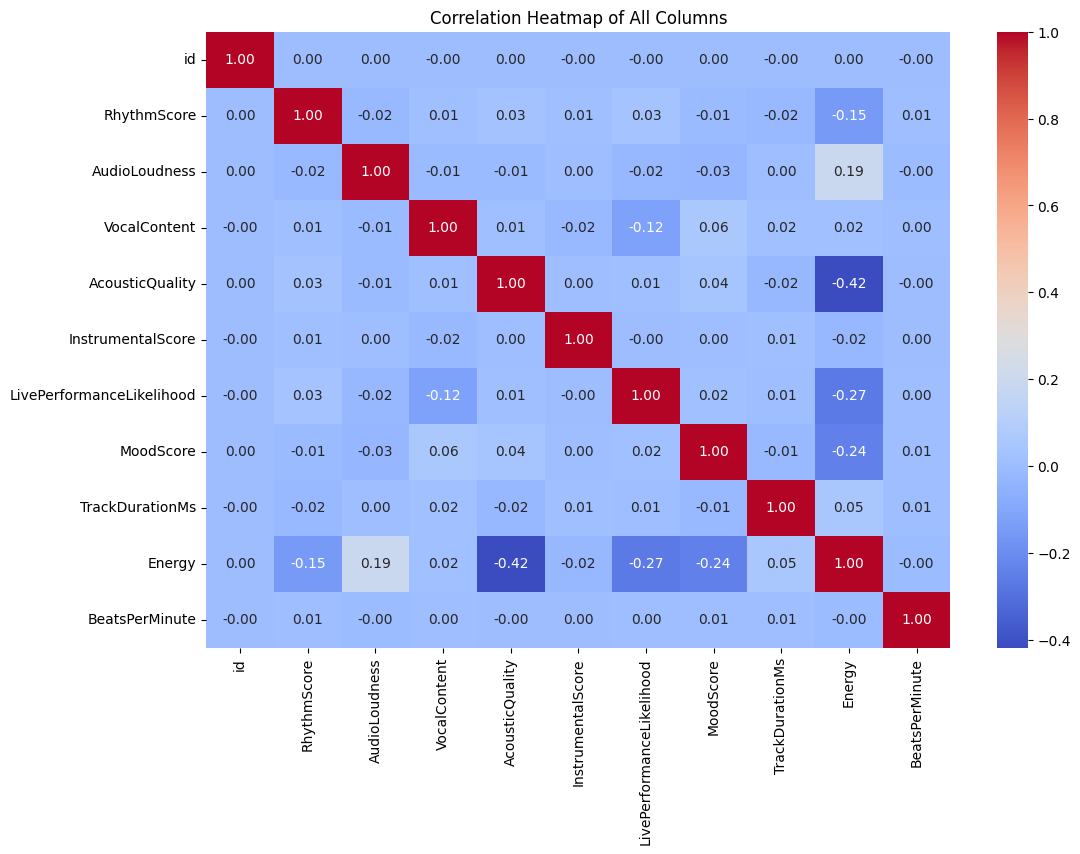

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Columns')
plt.show()

# Importing training models

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Target and features
X = df.drop("BeatsPerMinute", axis=1)   # Features
y = df["BeatsPerMinute"]                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 2. Define Models
# =======================
models = {
    "Linear Regression": LinearRegression(),
}

# =======================
# 3. Train & Evaluate
# =======================
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Show results
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE       RMSE        R²
Linear Regression  21.184131  26.443876  0.000095


# Task
Apply the same data transformations to `/content/drive/MyDrive/Kaggle/test.csv` as were applied to the training data, predict 'BeatsPerMinute' using the trained Linear Regression model, and export the results to `submission.csv` in the format of `/content/sample_submission.csv` with a download option.

## Load test data

### Subtask:
Load the data from `/content/drive/MyDrive/Kaggle/test.csv` into a pandas DataFrame.


**Reasoning**:
Load the test data into a pandas DataFrame and display its head and info to check the structure and data types.



In [8]:
df_test = pd.read_csv('/kaggle/input/train-and-test/test.csv')
print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB
None


id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0  524164     0.410013     -16.794967      0.023500         0.232910   
1  524165     0.463071      -1.357000      0.141818         0.057725   
2  524166     0.686569      -3.368928      0.167851         0.287823   
3  524167     0.885793      -5.598049      0.118488         0.000005   
4  524168     0.637391      -7.068160      0.126099         0.539073   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.012689                   0.271585   0.664321      302901.5498   
1           0.257942                   0.097624   0.829552      221995.6643   
2           0.210915                   0.325909   0.304978      357724.0127   
3           0.376906                   0.134435   0.487740      271790.3989   
4           0.068950                   0.024300   0.591248      277728.5383   

     Energy  
0  0.424867  
1  0.846000  
2  0.134067  
3  0.316467  
4  0.481067

**Reasoning**:
The previous command failed because the pandas library was not imported in the current session. I will import pandas and then load the test data into a pandas DataFrame, displaying its head and info to check the structure and data types.



In [9]:
import pandas as pd
df_test = pd.read_csv('/kaggle/input/train-and-test/test.csv')
print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB
None


id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0  524164     0.410013     -16.794967      0.023500         0.232910   
1  524165     0.463071      -1.357000      0.141818         0.057725   
2  524166     0.686569      -3.368928      0.167851         0.287823   
3  524167     0.885793      -5.598049      0.118488         0.000005   
4  524168     0.637391      -7.068160      0.126099         0.539073   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.012689                   0.271585   0.664321      302901.5498   
1           0.257942                   0.097624   0.829552      221995.6643   
2           0.210915                   0.325909   0.304978      357724.0127   
3           0.376906                   0.134435   0.487740      271790.3989   
4           0.068950                   0.024300   0.591248      277728.5383   

     Energy  
0  0.424867  
1  0.846000  
2  0.134067  
3  0.316467  
4  0.481067

## Apply data transformations

### Subtask:
Apply the same scaling, feature engineering, and column reordering steps to the test DataFrame as were applied to the training data.


**Reasoning**:
Apply the same scaling, feature engineering, and column reordering steps to the test DataFrame as were applied to the training data.



**Reasoning**:
The previous code block failed because X_train was not defined. I need to redefine X_train before reordering the columns in df_test. I will also continue with the remaining steps of the subtask, which is to reorder the columns in df_test to match the order of columns in X_train.



**Reasoning**:
The previous code block failed because `df` was not defined. I need to define `df` again to create `X_train`. I will then continue with the remaining steps of the subtask, which is to reorder the columns in `df_test` to match the order of columns in `X_train`.



## Predict using linear regression

### Subtask:
Use the trained Linear Regression model from the previous step to predict the 'BeatsPerMinute' for the test data.


**Reasoning**:
Predict 'BeatsPerMinute' for the test data using the trained Linear Regression model.



In [10]:
linear_reg_model = models["Linear Regression"]
test_predictions = linear_reg_model.predict(df_test)

In [11]:
results_df = pd.DataFrame(results).T
print(results_df)

linear_reg_model = models["Linear Regression"]
test_predictions = linear_reg_model.predict(df_test)

                         MAE       RMSE        R²
Linear Regression  21.184131  26.443876  0.000095


In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [13]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'id': df_test['id'], 'BeatsPerMinute': test_predictions})

# Save the submission file to the output directory (for Kaggle)
submission_df.to_csv('submission.csv', index=False)